**<h1 align="center" > Business Cases with Data Science - Case 1</h1>**


**Group members:**<br> 
Chloé Deschanel - 20240693 <br>
Diogo Carvalho - 20240694 <br>
Ingrid Lopez - 20240692 <br>
Ruben Marques- 20240352

# Table of Contents

# 1. Data Exploration

 ## 1.1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options to show all rows
pd.set_option('display.max_rows', None)

## 1.2 Loading Data

In [2]:
data = pd.read_csv("../Data/Case1_HotelCustomerSegmentation.csv", sep=";")

In [3]:
# Display all columns
pd.set_option('display.max_columns', None)
data.sample(5)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
5908,5909,PRT,NaN,1258,0xE07DD695521B559ED16D4465B56862B560BB016D8A5D...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,166,309.0,62.0,0,0,1,8,4,Direct,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0
46475,46476,ITA,33.0,605,0x582DAA6FAAFEA8A7A41C2098A64C544F2A0BD3FB01B1...,0x461DE58BD2D6525D5244C2A34C6D5B14A54919D540E9...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4330,4331,BEL,48.0,1285,0x257729E31A945FE361F5BACD2EBE4021C075A199317D...,0x320A85372BEC4AFB89DC262A7A5B881E5E1817A0706A...,61,320.4,54.0,0,0,1,6,3,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
25139,25140,FRA,51.0,931,0xAE00147E1F2DF5948117E49C2FFA94E8B21A21E02D42...,0xE86A0430FBAC76A38F0E5B8914A2939C1D9A44C3CFED...,79,397.2,84.0,0,0,1,12,4,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0
59743,59744,FRA,46.0,491,0x2E1FFFAA5CC156801FA3C6F59C9D10DA803C45C01008...,0x11F659AB6D3B3B4C460644FBD14154063B9C4691F7BE...,102,589.0,214.0,0,0,1,12,4,Direct,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Set ID as index
data.set_index('ID', inplace=True)

| #   | Column Name        | Description                                                                                       |
|:----|:-------------------|:--------------------------------------------------------------------------------------------------|
| 1   | ID        | Customer ID customer. |
| 2   | Nationality    | Nationality of the customer in ISO 3166-1 (Alpha 3) format. |
| 3   | Age       | Age of the customer. |
| 4   | DaysSinceCreation       | Number of elapsed days since the customer was created. |
| 5   | NameHash | Hash of the customer's name. |
| 6   | DocIDHash | Hash of the customer’s personal document identification number (usually a passport or ID card). |
| 7   | AverageLeadTime | Average number of days before arrival date the customer makes bookings. |
| 8   | LodgingRevenue | Total amount of lodging revenue paid by the customer so far. |
| 9   | OtherRevenue | Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far. |
| 10  | BookingsCanceled | Number of bookings the customer made but subsequently canceled. |
| 11  | BookingsNoShowed | Number of bookings the customer made but subsequently made a "no-show". |
| 12  | BookingsCheckedin | Number of bookings the customer made, which actually ended up staying. |
| 13  | PersonNights | Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in each booking, multiplied by the number of Nights (Length-of-stay) of the booking. |
| 14  | RoomNights | Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-of- stay) of the booking. |
| 15  | DistributionChannel | Distribution channel normally used by the customer to make bookings at the hotel. |
| 16  | MarketSegment | Current market segment of the customer. |
| 17  | SRHighFloor | Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes). |
| 18  | RLowFloor  | Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes).  | 
| 19  | SRAccessibleRoom | Indication if the customer usually asks for an accessible room (0: No, 1: Yes). |
| 20  | SRMediumFloor | Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes). |
| 21  | SRBathtub | Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes). |
| 22  | SRShower | Indication if the customer usually asks for a room with a shower (0: No, 1: Yes). |
| 23  | SRCrib  | Indication if the customer usually asks for a crib (0: No, 1: Yes). |
| 24  | SRKingSizeBed | Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes). |
| 25  | SRTwinBed | Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes). |
| 26  | SRNearElevator | Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes). |
| 27  | SRAwayFromElevator | Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes). |
| 28  | SRNoAlcoholInMiniBar | Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes). |
| 29  | SRQuietRoom | Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes). |


# Data analysis

In [5]:
# Drop columns relative to identification (NameHash, DocIDHash)
data.drop(['NameHash', 'DocIDHash'], axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   AverageLeadTime       111733 non-null  int64  
 4   LodgingRevenue        111733 non-null  float64
 5   OtherRevenue          111733 non-null  float64
 6   BookingsCanceled      111733 non-null  int64  
 7   BookingsNoShowed      111733 non-null  int64  
 8   BookingsCheckedIn     111733 non-null  int64  
 9   PersonsNights         111733 non-null  int64  
 10  RoomNights            111733 non-null  int64  
 11  DistributionChannel   111733 non-null  object 
 12  MarketSegment         111733 non-null  object 
 13  SRHighFloor           111733 non-null  int64  
 14  SRLowFloor            111733 non-null  int64  
 15  SRAcc

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,107561.0,45.639191,17.244952,-10.0,33.0,47.0,58.0,123.00
DaysSinceCreation,111733.0,595.026599,374.657382,36.0,288.0,522.0,889.0,1385.00
AverageLeadTime,111733.0,60.833147,85.115320,-1.0,0.0,21.0,95.0,588.00
LodgingRevenue,111733.0,283.851283,379.131556,0.0,0.0,208.0,393.3,21781.00
OtherRevenue,111733.0,64.682802,123.580715,0.0,0.0,31.0,84.0,8859.25
BookingsCanceled,111733.0,0.002282,0.080631,0.0,0.0,0.0,0.0,15.00
BookingsNoShowed,111733.0,0.000600,0.028217,0.0,0.0,0.0,0.0,3.00
BookingsCheckedIn,111733.0,0.737607,0.730889,0.0,0.0,1.0,1.0,76.00
PersonsNights,111733.0,4.328318,4.630739,0.0,0.0,4.0,6.0,116.00
RoomNights,111733.0,2.203825,2.301637,0.0,0.0,2.0,3.0,185.00


## Age
`Age:` <br>
Has missing values; <br>
Average age is 45 years; <br>
Min is -10; <br>
Max is 123.

Actionables: Deal with missing values, plot age distribution, check cases where age is negative, check cases where age is above 100. <br>


**TO DO: Create bins with age segments.**

In [8]:
# Display rows for missing values in age column
data[data['Age'].isnull()].sample(5)

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
96527,PRT,NaN,161,102,332.0,439.95,0,0,1,8,4,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,1,0,0,0,0
3308,PRT,NaN,1305,13,219.0,43.00,0,0,1,2,1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
105861,PRT,NaN,82,0,0.0,0.00,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,1,0,0,0,0,0,0
23233,PRT,NaN,961,11,414.0,42.00,0,0,1,2,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
5328,PRT,NaN,1268,71,302.4,52.00,0,0,1,6,3,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# Check age correlation with other columns 
data.select_dtypes(include=[np.number]).corr()['Age'].sort_values(ascending=False)

Age                     1.000000
AverageLeadTime         0.261786
BookingsCheckedIn       0.146982
RoomNights              0.139599
DaysSinceCreation       0.127568
PersonsNights           0.120793
OtherRevenue            0.118851
LodgingRevenue          0.061177
SRTwinBed               0.050583
SRNearElevator          0.013616
SRLowFloor              0.012960
SRShower                0.008962
BookingsCanceled        0.008759
SRQuietRoom             0.008154
SRAwayFromElevator      0.007683
BookingsNoShowed        0.007069
SRAccessibleRoom        0.004509
SRMediumFloor           0.003319
SRNoAlcoholInMiniBar   -0.011765
SRHighFloor            -0.021887
SRBathtub              -0.022021
SRKingSizeBed          -0.025645
SRCrib                 -0.136364
Name: Age, dtype: float64

Our goal by checking this correlation was to see if any variable was correlated with age enough, that we could use in a predictive model to predict age. Since the highest correlated variable is 26% correlation, we discarded this idea, and just assumed to input median.

In [10]:
# Check cases where age is negative
print(f'There are {len(data[data['Age'] < 0])} cases where age is negative')
data[data['Age'] < 0]

There are 14 cases where age is negative


,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
2053,BIH,-6.0,1324,0,0.00,0.00,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
2469,ATF,-6.0,1319,0,0.00,0.00,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5128,FRA,-8.0,1271,66,93.30,14.00,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
6752,GBR,-10.0,1243,22,450.00,18.00,0,0,1,1,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
8361,DEU,-6.0,1217,256,126.00,109.00,0,0,1,4,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,1,0,0,0,0
8629,NLD,-9.0,1213,111,414.60,34.00,0,0,1,4,4,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
9920,DZA,-5.0,1193,54,138.93,29.50,0,0,1,4,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
10663,DEU,-9.0,1181,292,126.00,113.00,0,0,1,4,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
10695,DEU,-9.0,1181,292,128.00,57.50,0,0,1,2,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0


All rows with negative values for age have in common DistributionChannel = 'Travel Agent/Operator', and are between [-10, -5].


In [11]:
# Drop rows where ID = 2053 AND 2469 as all columns are zeros and age is negative
data.drop([2053, 2469], inplace=True)

In [12]:
# Check cases where age is above 100
print(f'There are {len(data[data['Age'] > 100])} cases where age is above 100')
data[data['Age'] > 100]

There are 9 cases where age is above 100


,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
3282,PRT,115.0,1305,22,79.0,25.5,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
18912,BEL,111.0,1058,215,140.0,164.8,0,0,1,2,2,Corporate,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
25590,DEU,114.0,924,7,492.0,76.4,0,0,1,4,4,Direct,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0
44525,DEU,114.0,627,7,234.0,34.5,0,0,1,4,2,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
45089,PRT,115.0,620,2,266.0,43.0,0,0,1,2,2,Travel Agent/Operator,Other,1,0,0,0,0,0,0,1,0,0,0,0,0
53298,ITA,123.0,543,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
58052,AUT,114.0,503,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,1
64256,ESP,110.0,456,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,1
87089,PRT,111.0,244,18,210.0,52.0,0,0,1,4,2,Direct,Direct,1,0,0,0,0,0,0,1,0,0,0,0,0


We will drop the person with ID: 53298 (age 123) because it has zero on all values. So even if it is a real person, it just doesn't add any value to our segmentation.

In [13]:
# Drop row with id = 53298
data.drop(53298, inplace=True)

In [14]:
# Turn the remaining rows with age below 0 to NaN
data.loc[data['Age'] < 0, 'Age'] = np.nan

In [15]:
# Fill missing values with median
data['Age'].fillna(data['Age'].median(), inplace=True)

/var/folders/_p/41c5vhm5085_zhqsl8brxs8c0000gn/T/ipykernel_18746/2581834537.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [16]:
# check for missing values in age
print(f'There are {data["Age"].isnull().sum()} missing values left in Age column')

There are 0 missing values left in Age column


## Nationality

Key take aways:
- Nationality is a categorical variables that has high cardinality, with 199 classes (199 different nationalities);
- The top20 of those nationalities by frequency represent ~91% of the total customers;
- The top nation is France, with 16516 customers, accounting for ~15% of total customers;
- There are 96 nationalities with less than 10 occurrences; <br>
`Nationality has a correlation with LodgingRevenue of 0.97`

Next steps:

Multivariate analysis:
- Revenue Contribution: Analyze how customers from different nationalities contribute to LodgingRevenue and OtherRevenue.
- Booking Behavior: Check differences in AverageLeadTime, BookingsCanceled, BookingsNoShowed, and BookingsCheckedin based on nationality.
- Stay Patterns: Compare PersonNights and RoomNights across nationalities.
- Market Segment & Distribution Channel: Determine if certain nationalities book more through specific channels or belong to particular segments.

A/B Test Grouping countries by: <br>
- Geographic region (e.g., Western Europe, North America, etc.) <br>
- Economic factors (e.g., GDP, GDP/capita)

In [17]:
# Put the top20 nationalities in a list
top20_nationalities = data['Nationality'].value_counts().head(20).index.tolist()
print(f'The top 20 nationalities are {top20_nationalities}.')

The top 20 nationalities are ['FRA', 'DEU', 'PRT', 'GBR', 'ESP', 'USA', 'ITA', 'BEL', 'BRA', 'NLD', 'IRL', 'CHE', 'CAN', 'AUT', 'SWE', 'ISR', 'CHN', 'NOR', 'POL', 'AUS'].


In [18]:
# Get the value counts for each nationality
nationality_counts = data['Nationality'].value_counts()

# Get the total count of all nationalities
total_count = nationality_counts.sum()

# Compute the percentage representation of the top 20 nationalities
top20_percentages = round((nationality_counts.loc[top20_nationalities] / total_count) * 100,2)

# Display the results in a DataFrame
top20_df = pd.DataFrame({'Nationality': top20_nationalities, 'Percentage': top20_percentages.values})

top20_df

,Nationality,Percentage
0,FRA,14.78
1,DEU,13.25
2,PRT,12.62
3,GBR,10.26
4,ESP,5.48
5,USA,4.84
6,ITA,3.82
7,BEL,3.68
8,BRA,3.61
9,NLD,3.40


In [19]:
nationality_counts.loc[top20_nationalities]

Nationality
FRA    16516
DEU    14805
PRT    14101
GBR    11462
ESP     6123
USA     5409
ITA     4267
BEL     4111
BRA     4037
NLD     3794
IRL     2938
CHE     2686
CAN     2192
AUT     1949
SWE     1687
ISR     1149
CHN     1147
NOR     1055
POL     1035
AUS     1022
Name: count, dtype: int64

In [20]:
# Sum the percentages in the top 10 nationalities
top20_marketshare = top20_df['Percentage'].sum()
print(f'The top 20 nationalities represent {round(top20_marketshare,2)}% of the total market share')

The top 20 nationalities represent 90.82% of the total market share


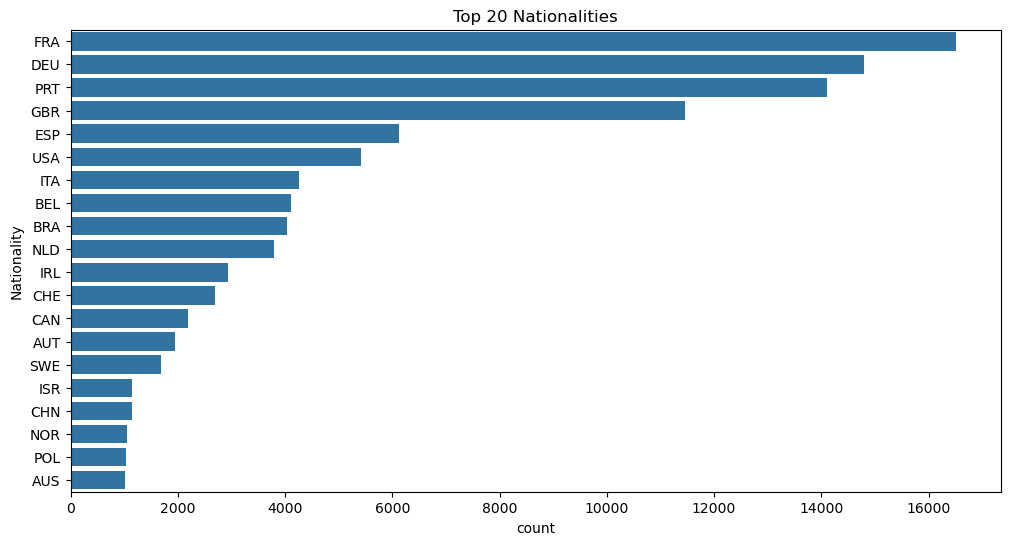

In [21]:
# Plot the top20 nationalities
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Nationality', order=top20_nationalities)
plt.title('Top 20 Nationalities')
plt.show()

In [22]:
# check how many nationalities have less than 10 occurrences
nationalities_less_than_10 = nationality_counts[nationality_counts < 10].index
print(f'There are {nationalities_less_than_10.shape[0]} nationalities with less than 10 occurrences')

There are 96 nationalities with less than 10 occurrences


In [23]:
# Create a feature called TotalRevenue which is the sum of LodgingRevenue and OtherRevenue
data['TotalRevenue'] = data['LodgingRevenue'] + data['OtherRevenue']

In [24]:
# check for correlation between nationality and other columns
data.select_dtypes(include=[np.number]).corr()['TotalRevenue'].sort_values(ascending=False)

TotalRevenue            1.000000
LodgingRevenue          0.972366
RoomNights              0.717433
PersonsNights           0.703531
OtherRevenue            0.697866
BookingsCheckedIn       0.453681
AverageLeadTime         0.285230
DaysSinceCreation       0.116097
Age                     0.080664
BookingsCanceled        0.069964
BookingsNoShowed        0.064957
SRQuietRoom             0.045257
SRKingSizeBed           0.015205
SRHighFloor             0.014615
SRAwayFromElevator      0.012430
SRShower                0.010321
SRMediumFloor           0.005267
SRLowFloor              0.003634
SRBathtub               0.003529
SRNearElevator          0.002609
SRAccessibleRoom        0.000399
SRNoAlcoholInMiniBar   -0.000877
SRTwinBed              -0.004446
SRCrib                 -0.019694
Name: TotalRevenue, dtype: float64

## DaysSinceCreation

**Definition:** Number of days since the customer was created in the system. <br>
**Relevance:** Indicates customer tenure or loyalty, as older customers may behave differently from newer ones.


Insights:
- No missing values
- Statistical insights: Min is 36 day, max is 1385 days. Average is 595 days.
- From the distribution, it looks to be a cyclical trend, that after 8 months there's a low in new customer registering to the system. Probably show a seasonal trend.
- There's also an overall negative trend in new customers over time.

In [25]:
# Check for missing values
data['DaysSinceCreation'].isnull().sum()

0

In [26]:
data['DaysSinceCreation'].describe()

count    111730.000000
mean        595.014061
std         374.649771
min          36.000000
25%         288.000000
50%         522.000000
75%         889.000000
max        1385.000000
Name: DaysSinceCreation, dtype: float64

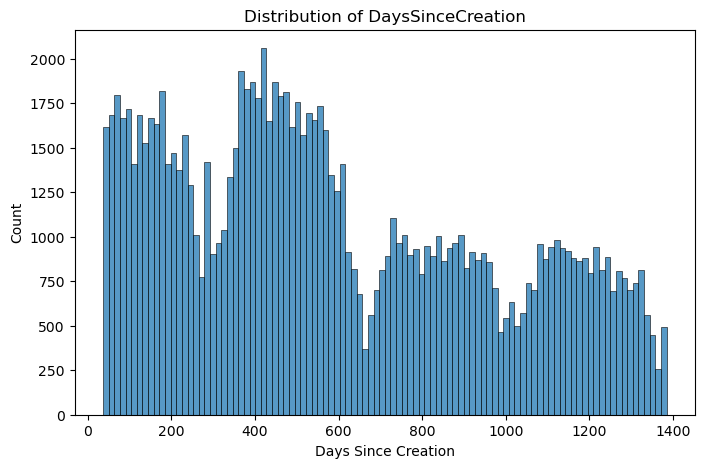

In [27]:
# Plot the distribution of DaysSinceCreation
plt.figure(figsize=(8,5))
sns.histplot(data['DaysSinceCreation'], bins=100, kde=False) # the graphs spams 1349 days, so each bar represents ~13 days.
plt.title('Distribution of DaysSinceCreation')
plt.xlabel('Days Since Creation')
plt.ylabel('Count')
plt.show()

In [28]:
# check for correlation between DaysSinceCreation and other columns
data.select_dtypes(include=[np.number]).corr()['DaysSinceCreation'].sort_values(ascending=False)

DaysSinceCreation       1.000000
BookingsCheckedIn       0.268700
PersonsNights           0.231765
RoomNights              0.228442
AverageLeadTime         0.154132
Age                     0.126641
OtherRevenue            0.119417
TotalRevenue            0.116097
LodgingRevenue          0.100373
BookingsCanceled        0.017451
BookingsNoShowed        0.015032
SRHighFloor             0.013608
SRMediumFloor           0.006044
SRAwayFromElevator      0.005122
SRAccessibleRoom        0.003584
SRShower               -0.000888
SRLowFloor             -0.001020
SRNearElevator         -0.002237
SRBathtub              -0.011139
SRNoAlcoholInMiniBar   -0.012617
SRQuietRoom            -0.031401
SRKingSizeBed          -0.045758
SRCrib                 -0.051906
SRTwinBed              -0.067794
Name: DaysSinceCreation, dtype: float64

## AverageLeadTime

**Definition:** This represents the average number of days before the arrival date that a customer makes a booking. <br>
**Relevance:** Helps identify customer booking behavior. <br>
        Short lead time: Could indicate last-minute or business travelers <br>
        Long lead time: Often linked to vacationers or planned trips 


Insights:
- No missing values; 
- Statistical insights: Average lead time is ~60days, however with a std of 85 this suggest a big variation in booking behaviors.
- There are negative values, which is invalid (lead time should not be negative)
- Percentiles <br>
25% (Q1): 0 days → At least 25% of customers book on the same day (last-minute bookings).<br>
50% (Median): 21 days → Half of the customers book at least 3 weeks in advance.<br>
75% (Q3): 95 days → The top 25% of customers book more than 3 months in advance.



In [36]:
data['AverageLeadTime'].describe()

count    111730.000000
mean         60.834780
std          85.115879
min          -1.000000
25%           0.000000
50%          21.000000
75%          95.000000
max         588.000000
Name: AverageLeadTime, dtype: float64

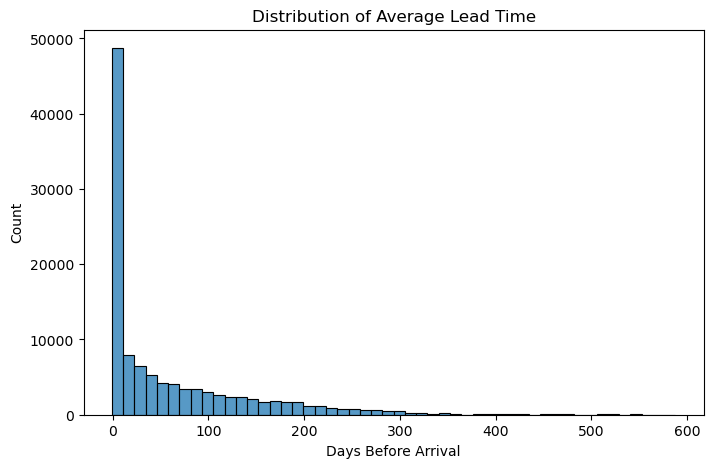

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data['AverageLeadTime'], bins=50)
plt.title('Distribution of Average Lead Time')
plt.xlabel('Days Before Arrival')
plt.ylabel('Count')
plt.show()

In [30]:
# Check the correlation with other variables
data.select_dtypes(include=[np.number]).corr()['AverageLeadTime'].sort_values(ascending=False)

AverageLeadTime         1.000000
PersonsNights           0.389849
RoomNights              0.357555
TotalRevenue            0.285230
BookingsCheckedIn       0.278036
LodgingRevenue          0.259707
Age                     0.257663
OtherRevenue            0.253175
DaysSinceCreation       0.154132
SRTwinBed               0.073907
SRShower                0.005794
SRQuietRoom             0.003556
SRMediumFloor           0.001377
SRLowFloor              0.000131
SRAwayFromElevator     -0.000830
SRAccessibleRoom       -0.000871
SRNearElevator         -0.001843
SRNoAlcoholInMiniBar   -0.007812
SRBathtub              -0.008461
BookingsNoShowed       -0.010501
BookingsCanceled       -0.012608
SRHighFloor            -0.013365
SRKingSizeBed          -0.021482
SRCrib                 -0.044965
Name: AverageLeadTime, dtype: float64

### Fixing negative values

In [45]:
print(f'There are {data[data['AverageLeadTime'] < 0].shape[0]} cases where AverageLeadTime is negative.')
data[data['AverageLeadTime'] < 0]

There are 13 cases where AverageLeadTime is negative.


,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
23064,PRT,47.0,964,-1,352.00,30.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,382.00
29374,USA,25.0,870,-1,77.49,3.0,0,0,1,3,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,80.49
51375,CHN,33.0,558,-1,129.00,2.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,131.00
58655,FRA,57.0,499,-1,149.00,2.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,151.00
58662,FRA,62.0,499,-1,149.00,2.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,151.00
58676,FRA,61.0,499,-1,149.00,2.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,151.00
60590,ESP,46.0,485,-1,159.00,2.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,161.00
62690,USA,70.0,468,-1,95.20,2.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,97.20
68486,GBR,46.0,424,-1,282.00,24.0,0,0,1,4,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,306.00


All bookings are made through “Travel Agent/Operator”. Nationality, DaysSinceCreation and revenue values make this entries look real.
- This suggests that the negative value might result from how the travel agency processes or records bookings.
- It could be a data entry issue where the system logs missing lead times as -1 for specific booking sources.

Action to take: Classify negative values as missing values, and then input them with the median.

In [48]:
# Turn the negative values to NaN
data.loc[data['AverageLeadTime'] < 0, 'AverageLeadTime'] = np.nan

# Fill missing values with median
data['AverageLeadTime'].fillna(data['AverageLeadTime'].median(), inplace=True)

/var/folders/_p/41c5vhm5085_zhqsl8brxs8c0000gn/T/ipykernel_18746/1785307480.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['AverageLeadTime'].fillna(data['AverageLeadTime'].median(), inplace=True)


## LodgingRevenue

In [51]:
data.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,59.0,292.0,82.3,1,0,2,6,4,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,374.3
2,PRT,47.0,1385,61.0,280.0,53.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,333.0
3,DEU,32.0,1385,0.0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,FRA,61.0,1385,93.0,240.0,60.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,300.0
5,FRA,52.0,1385,0.0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


# Multivariate analysis

## Revenue per nationality

In [31]:
# Get the top 20 nationalities with the highest lodging revenue
top20_nationalities_lodging = data.groupby('Nationality')['LodgingRevenue'].sum().sort_values(ascending=False).head(20)
top20_nationalities_lodging

Nationality
FRA    4810214.20
DEU    4038958.55
GBR    3416408.53
PRT    3108506.31
ESP    1745509.31
USA    1424082.66
BEL    1291610.76
ITA    1271022.19
NLD    1173219.27
BRA    1057544.27
IRL     855214.85
CHE     843678.75
SWE     584825.48
AUT     584445.96
CAN     499314.73
NOR     378304.67
DNK     359650.49
CHN     340059.14
ISR     320602.17
POL     309264.08
Name: LodgingRevenue, dtype: float64

In [32]:
# Get the top 20 nationalities with the highest other revenue
top20_nationalities_other = data.groupby('Nationality')['OtherRevenue'].sum().sort_values(ascending=False).head(20)
top20_nationalities_other

Nationality
FRA    1299282.70
DEU     989939.10
GBR     752023.41
PRT     750935.55
ESP     374468.83
BEL     323882.45
USA     309294.73
ITA     283802.08
NLD     246971.34
BRA     244248.32
CHE     161110.17
SWE     157647.02
IRL     140576.75
AUT     132253.05
CAN     116879.62
NOR      82309.43
AUS      79315.34
DNK      68621.87
POL      59714.53
FIN      52028.23
Name: OtherRevenue, dtype: float64

In [33]:
# Get the top 10 nationalities with the highest TotalRevenue
top20_nationalities_total = data.groupby('Nationality')['TotalRevenue'].sum().sort_values(ascending=False).head(20)
top20_nationalities_total

Nationality
FRA    6109496.90
DEU    5028897.65
GBR    4168431.94
PRT    3859441.86
ESP    2119978.14
USA    1733377.39
BEL    1615493.21
ITA    1554824.27
NLD    1420190.61
BRA    1301792.59
CHE    1004788.92
IRL     995791.60
SWE     742472.50
AUT     716699.01
CAN     616194.35
NOR     460614.10
DNK     428272.36
CHN     385674.35
POL     368978.61
ISR     367230.09
Name: TotalRevenue, dtype: float64

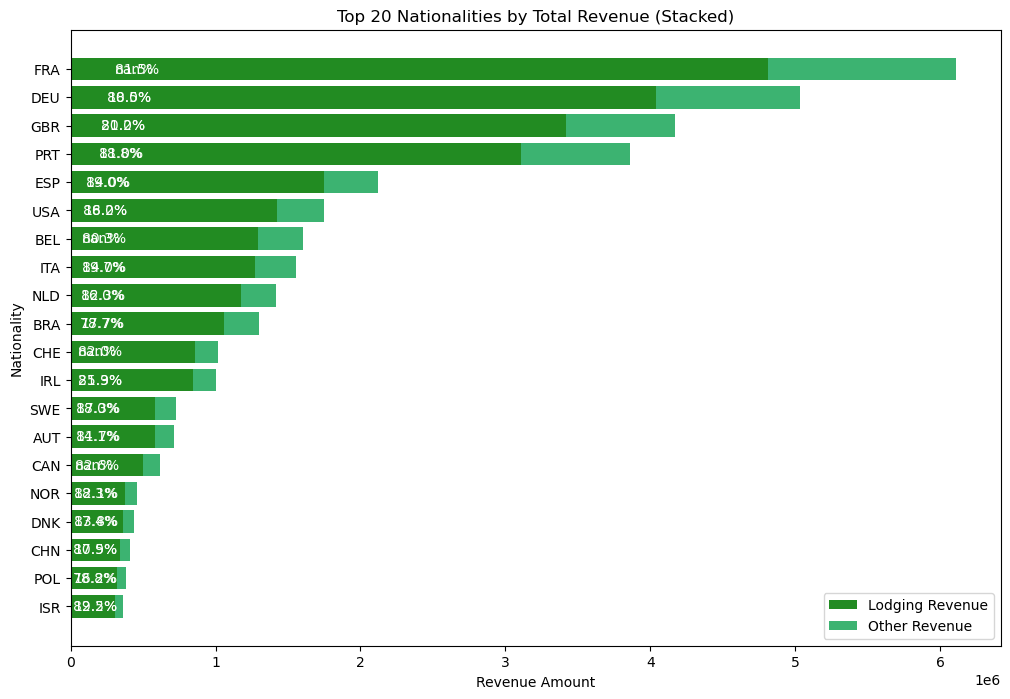

In [34]:
# Set up positions for the bars
y_positions = np.arange(len(top20_nationalities_total))  # Get indices for nationalities

# Compute the proportions for Lodging and Other Revenue
lodging_percentage = (top20_nationalities_lodging / top20_nationalities_total) * 100
other_percentage = (top20_nationalities_other / top20_nationalities_total) * 100

# Create the plot
plt.figure(figsize=(12, 8))

# Plot stacked horizontal bars
plt.barh(y_positions, top20_nationalities_lodging, color='forestgreen', label='Lodging Revenue')
plt.barh(y_positions, top20_nationalities_other, left=top20_nationalities_lodging, color='mediumseagreen', label='Other Revenue')

# Add percentage labels inside the bars
for i, (lodging, other, total) in enumerate(zip(lodging_percentage, other_percentage, top20_nationalities_total)):
    plt.text(total * 0.05, y_positions[i], f"{lodging:.1f}%", va='center', color='white', fontsize=10)  # Lodging %
    plt.text(lodging + (total * 0.05), y_positions[i], f"{other:.1f}%", va='center', color='white', fontsize=10)  # Other %

# Customize the plot
plt.yticks(y_positions, top20_nationalities_total.index)  # Set y-ticks to nationalities
plt.xlabel("Revenue Amount")
plt.ylabel("Nationality")
plt.title("Top 20 Nationalities by Total Revenue (Stacked)")
plt.legend()

# Invert y-axis for better readability
plt.gca().invert_yaxis()

# Show plot
plt.show()

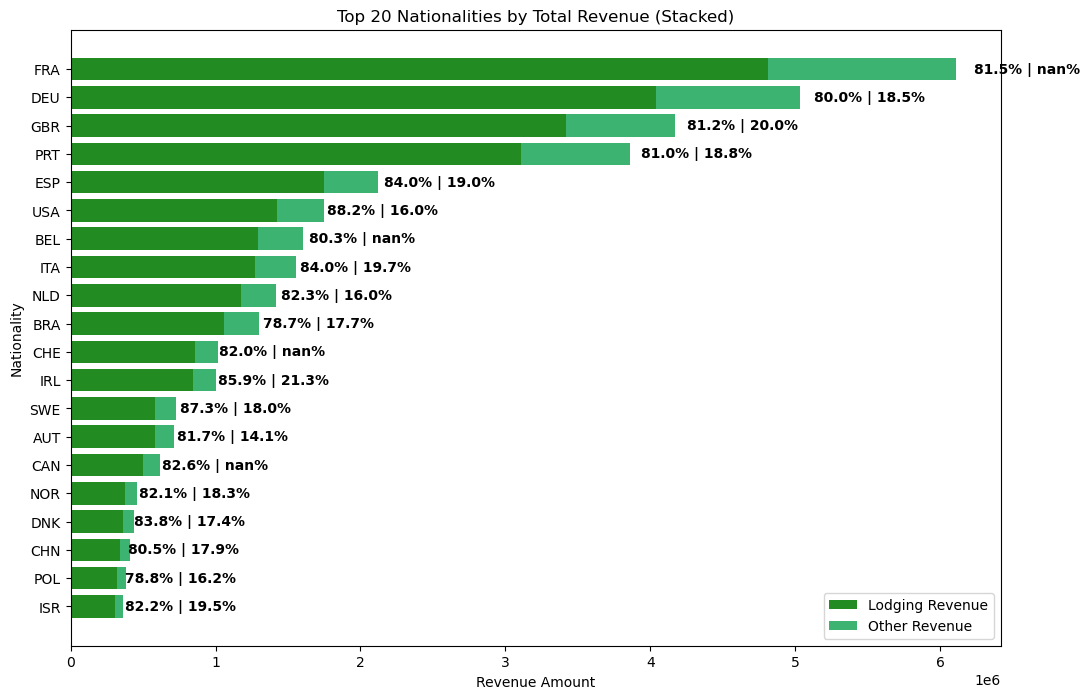

In [35]:
# Set up positions for the bars
y_positions = np.arange(len(top20_nationalities_total))  # Get indices for nationalities

# Compute the proportions for Lodging and Other Revenue
lodging_percentage = (top20_nationalities_lodging / top20_nationalities_total) * 100
other_percentage = (top20_nationalities_other / top20_nationalities_total) * 100

# Create the plot
plt.figure(figsize=(12, 8))

# Plot stacked horizontal bars
plt.barh(y_positions, top20_nationalities_lodging, color='forestgreen', label='Lodging Revenue')
plt.barh(y_positions, top20_nationalities_other, left=top20_nationalities_lodging, color='mediumseagreen', label='Other Revenue')

# Add percentage labels **outside** the bars
for i, (lodging, other, total) in enumerate(zip(lodging_percentage, other_percentage, top20_nationalities_total)):
    plt.text(total + (total * 0.02), y_positions[i], f"{lodging:.1f}% | {other:.1f}%", 
             va='center', ha='left', color='black', fontsize=10, fontweight='bold')  # Labels outside

# Customize the plot
plt.yticks(y_positions, top20_nationalities_total.index)  # Set y-ticks to nationalities
plt.xlabel("Revenue Amount")
plt.ylabel("Nationality")
plt.title("Top 20 Nationalities by Total Revenue (Stacked)")
plt.legend()

# Invert y-axis for better readability
plt.gca().invert_yaxis()

# Show plot
plt.show()